# Biocomputing with Brainoware
### Procedure 3 - Brainoware software framework
#### 4. Readout layer training and prediction
**Author: Hongwei Cai, Huiyu Chu**  
**Date: June 6, 2025**  
**Description**: This part describes readout layer training using the training dataset and test the classification accuracy using the test dataset.


In [1]:
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np 
import os 

with open(
    "./3_Information_decoding/spike_count_data.pkl",
    "rb",
) as f:
    spike_count_data = pickle.load(
        f
    )  # read the two-dimensional index list generated in the last section

classes = 8

## use sklearn MinMaxScaler to scale raw spike counts into [0,1] intervals
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(spike_count_data)
## generate label for each audioclip
y_categories = np.arange(0, classes, 1)
y=list()
for cat in y_categories:
    y_categories_copy=np.full((30,1), cat)
    y.append(y_categories_copy)
y=np.concatenate(y)
## split the dataset into training and test datasets with the ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(X_test.shape)

(168, 26240)
(72, 26240)


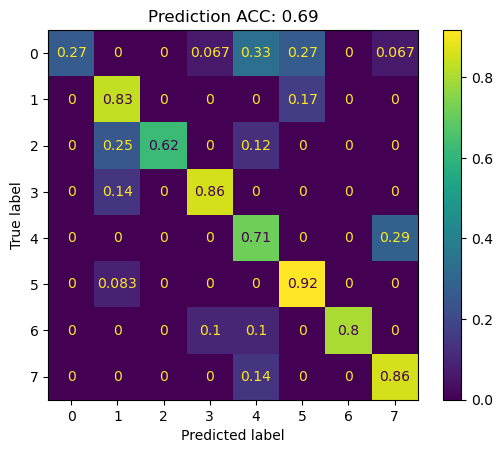

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## train the logistic regression model
clf = LogisticRegression().fit(X_train, y_train.ravel())
## make prediction using the test dataset input
y_pred=clf.predict(X_test)
## calculate the prediction accuracy score by comparing the predicted results and true labels
acc = accuracy_score(y_test, y_pred)

## calculate the normalized confusion matrix, display it, and save it to the results folder
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.title(f"Prediction ACC: {acc:.2f}")
result_saving_path=r'./4_Results/'
if not os.path.exists(result_saving_path):
    os.makedirs(result_saving_path)
plt.savefig(os.path.join(result_saving_path, 'speech_rec.svg'))
plt.savefig(os.path.join(result_saving_path, 'speech_rec.png'))
plt.show()